In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# data
from sklearn.datasets import load_iris

# skalearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential


In [56]:
# load the iris dataset
iris_data = load_iris() 
X = iris_data.data
y = iris_data.target

# make y categorical
y_label = tf.keras.utils.to_categorical(y)

In [57]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.25)

In [58]:
# declare model
model = Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(250, activation='relu',),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(3, activation='softmax')])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 500)               2500      
                                                                 
 dense_29 (Dense)            (None, 250)               125250    
                                                                 
 dense_30 (Dense)            (None, 100)               25100     
                                                                 
 dense_31 (Dense)            (None, 3)                 303       
                                                                 
Total params: 153153 (598.25 KB)
Trainable params: 153153 (598.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
# compile
model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'])

# scheduler
def const_scheduler(epoch):
    if epoch < 10:
          return 0.05
    elif epoch < 20:
          return 0.005
    else:
          return 0.0005

In [60]:
# train model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1,
    callbacks=[tf.keras.callbacks.LearningRateScheduler(const_scheduler)])

Epoch 1/30
4/4 [==============================] - 1s 53ms/step - loss: 19.8651 - accuracy: 0.3839 - val_loss: 1.1366 - val_accuracy: 0.3421 - lr: 0.0500
Epoch 2/30
4/4 [==============================] - 0s 11ms/step - loss: 1.0045 - accuracy: 0.3929 - val_loss: 0.9094 - val_accuracy: 0.6316 - lr: 0.0500
Epoch 3/30
4/4 [==============================] - 0s 11ms/step - loss: 0.7649 - accuracy: 0.6786 - val_loss: 0.4172 - val_accuracy: 0.7105 - lr: 0.0500
Epoch 4/30
4/4 [==============================] - 0s 11ms/step - loss: 0.3468 - accuracy: 0.8661 - val_loss: 0.4288 - val_accuracy: 0.7368 - lr: 0.0500
Epoch 5/30
4/4 [==============================] - 0s 11ms/step - loss: 0.3252 - accuracy: 0.8214 - val_loss: 0.2073 - val_accuracy: 0.8947 - lr: 0.0500
Epoch 6/30
4/4 [==============================] - 0s 13ms/step - loss: 0.1436 - accuracy: 0.9464 - val_loss: 0.0921 - val_accuracy: 0.9474 - lr: 0.0500
Epoch 7/30
4/4 [==============================] - 0s 11ms/step - loss: 0.1704 - accurac

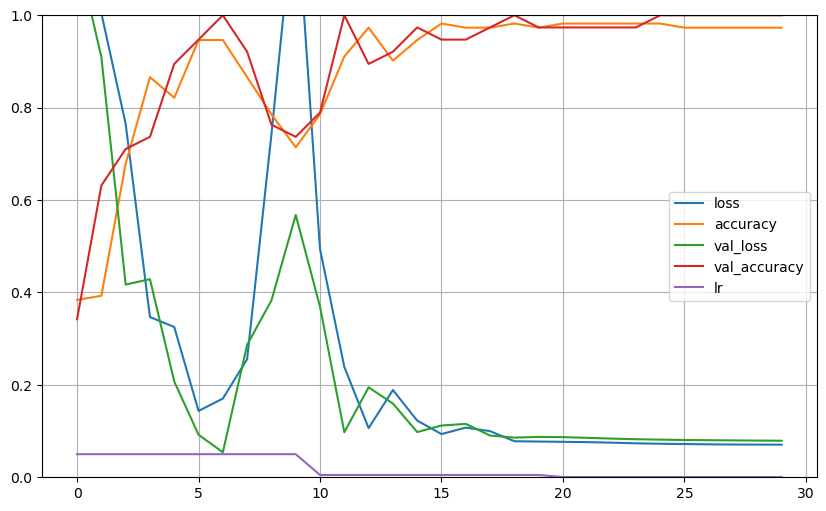

In [61]:
# performance monitor
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [62]:
# evaluate
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0791 - accuracy: 1.0000


[0.07911321520805359, 1.0]